Librerias

In [114]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Visualizacion Mapa
import geocoder
from IPython.display import IFrame
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium


Descargamos el dataset

In [88]:
file_id = '11Ju_njoylHatuDxD-isDh3Rw-FWq_kO6'

descarga = f'https://drive.google.com/uc?id={file_id}'

output = 'weatherAUS.csv'
gdown.download(descarga, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=11Ju_njoylHatuDxD-isDh3Rw-FWq_kO6
To: c:\Users\aleja\OneDrive\Escritorio\AA1-TP2\AA1-TUIA-Prado-Peralta-Duclos\weatherAUS.csv
100%|██████████| 14.1M/14.1M [00:01<00:00, 12.4MB/s]


'weatherAUS.csv'

In [89]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('weatherAUS.csv')
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [91]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Regiones
En primera instancia crearemos clusters con las ciudades del Dataset para catalogarlas en otra categoría: regiones

In [92]:
#Verificamos las ubicaciones únicas
localidades = list(df['Location'].unique())
print(f"Cantidad de ubicaciones únicas: {len(localidades)}")
print(localidades)

Cantidad de ubicaciones únicas: 49
['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru']


Creamos un diccionario con las coordenadas de cada localidad.

In [93]:

def obtener_coordenadas(localidad):
    g = geocoder.arcgis(localidad + ", Australia")
    if g.ok:
        print(f"coordenadas de {localidad}: {g.latlng}")
        return g.latlng[0], g.latlng[1]
    else:
        print(f"No se encontraron coordenadas para {localidad}")
        return None, None

# Diccionario de localidades con sus coordenadas
dic_localidades = {}

# Iteramos sobre las localidades y obtenemos sus coordenadas
for localidad in localidades:
    latitud, longitud = obtener_coordenadas(localidad)
    dic_localidades[localidad] = (latitud, longitud)



coordenadas de Albury: [-36.05662430199993, 146.93533047100004]
coordenadas de BadgerysCreek: [-33.88202130999997, 150.74521554800003]
coordenadas de Cobar: [-31.495860105999952, 145.832820727]
coordenadas de CoffsHarbour: [-30.29956872599996, 153.1117219450001]
coordenadas de Moree: [-29.47154720499998, 149.83939643700012]
coordenadas de Newcastle: [-32.927488995999965, 151.778915696]
coordenadas de NorahHead: [-33.28433173899998, 151.56580326800008]
coordenadas de NorfolkIsland: [-29.033329999999978, 167.95000000000005]
coordenadas de Penrith: [-33.69895810699995, 150.73343820700006]
coordenadas de Richmond: [-20.729606200999967, 143.14032278700006]
coordenadas de Sydney: [-33.87056747899993, 151.20723505800004]
coordenadas de SydneyAirport: [-33.87056747899993, 151.20723505800004]
coordenadas de WaggaWagga: [-35.12576999999993, 147.3537500000001]
coordenadas de Williamtown: [-32.80863303799998, 151.84911938200003]
coordenadas de Wollongong: [-34.42387755899995, 150.89379758300004]
c

Vemos las localidades en el mapa.

In [94]:


# Mapa centrado en Australia
mapa = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

for localidad, (lat, lon) in dic_localidades.items():
    folium.CircleMarker(
        location=[lat, lon],
        radius=1,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.8,
        tooltip=localidad  
    ).add_to(mapa)
mapa


Utilizaremos un algoritmo de clustering para armar las regiones. Especificamente usaremos K-Means.

In [95]:
# Convertimos el diccionario en un DataFrame

df_kmeans = pd.DataFrame(dic_localidades).T
df_kmeans.columns = ['lat', 'lon']
df_kmeans.index.names = ['Location']
df_kmeans.reset_index(inplace=True)
df_kmeans.head(5)


,Location,lat,lon
0,Albury,-36.056624,146.935330
1,BadgerysCreek,-33.882021,150.745216
2,Cobar,-31.495860,145.832821
3,CoffsHarbour,-30.299569,153.111722
4,Moree,-29.471547,149.839396


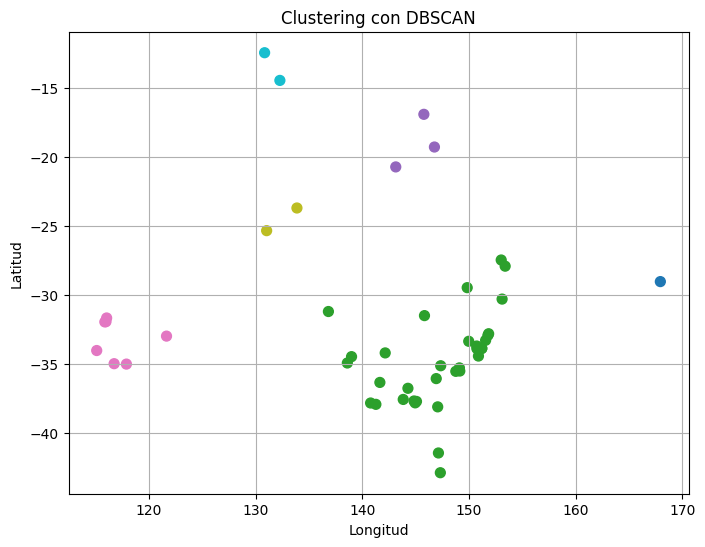

In [96]:

# Escalás las coordenadas
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(df_kmeans[['lat', 'lon']])

# Aplicás DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=2)  # Ajustá `eps` según la escala de tus datos
df_kmeans['cluster'] = dbscan.fit_predict(coords_scaled)

# Visualización simple
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_kmeans['lon'], df_kmeans['lat'], c=df_kmeans['cluster'], cmap='tab10', s=50)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Clustering con DBSCAN")
plt.grid(True)
plt.show()


In [97]:
# Observamos la cantidad de de regiones por cluster
df_kmeans.rename(columns={'cluster':'regiones'}, inplace=True)
nombre_regiones = {0:'zona1',1:'zona2',2:'zona3',3:'zona4',4:'zona5',-1:'zona6'}
df_kmeans['regiones'] = df_kmeans['regiones'].replace(nombre_regiones)
df_kmeans = df_kmeans[['Location','regiones']]
df_kmeans

,Location,regiones
0,Albury,zona1
1,BadgerysCreek,zona1
2,Cobar,zona1
3,CoffsHarbour,zona1
4,Moree,zona1
5,Newcastle,zona1
6,NorahHead,zona1
7,NorfolkIsland,zona6
8,Penrith,zona1
9,Richmond,zona2


In [99]:
# Para Clasificar todo el data set, mapeamos usando Location

df = df.merge(df_kmeans, on='Location')
df.head(5)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,regiones
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,zona1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,zona1
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,zona1
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,zona1
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,zona1


# Analisis de la variable target 'RainTomorrow'

In [103]:
# Cantidad de valores nulos en el target
print(df['RainTomorrow'].isna().sum())

# Porcentaje de valores nulos en el target respecto al total
print((df['RainTomorrow'].isna().sum())/len(df['RainTomorrow']))

3267
0.02245978275814657


Decidimos eliminar las filas que contienen valores nulos de mi variable target, ya que no representan un porcentaje significativo de nuestro dataset.

In [108]:
df = df.dropna(subset=['RainTomorrow'])
print(df['RainTomorrow'].isna().sum())

0


# EJERCICIO 2

## División de nuestro conjunto de datos

Separamos las variables predictoras de la objetivo

In [121]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

Dividimos el conjunto de datos en entrenamiento, validación y prueba.

- Entrenamiento: 60%
- Validación: 20%
- Prueba: 20%

In [124]:
# Train + Val vs test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train vs val
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# 0.25 * 0.8 = 0.2 → 60% train, 20% val, 20% test

In [125]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (85315, 23)
X_val shape: (28439, 23)
X_test shape: (28439, 23)
y_train shape: (85315,)
y_val shape: (28439,)
y_test shape: (28439,)
